In [264]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [323]:
df = pd.read_csv('freeze-temp-normalized2.csv')
df.head(n=10)

,Spring,Year,Spring_Temp,Julian,Fall,Fall_Temp,Fall_Julian,Season
0,1941-03-14,1941,30,73,1941-11-02,29,324,250
1,1942-03-24,1942,32,83,1942-11-12,29,316,232
2,1943-03-02,1943,29,79,1943-11-23,32,327,247
3,1944-03-29,1944,32,89,1944-11-14,31,319,229
4,1945-04-02,1945,31,92,1945-11-19,32,323,230
5,1946-04-07,1946,32,97,1946-10-16,30,289,191
6,1947-03-06,1947,31,65,1947-11-21,32,325,259
7,1948-04-27,1948,32,118,1948-10-27,32,301,182
8,1949-04-03,1949,32,93,1949-10-18,31,291,197
9,1950-04-24,1950,32,114,1950-11-01,32,314,199


In [356]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Julian ~ Year', data=df).fit()

# Inspect the results
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Julian   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     9.534
Date:                Sun, 12 Mar 2017   Prob (F-statistic):            0.00285
Time:                        16:16:09   Log-Likelihood:                -319.01
No. Observations:                  75   AIC:                             642.0
Df Residuals:                      73   BIC:                             646.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    648.2159    182.045      3.561      0.0

In [ ]:
# R-squared: 0.116 aka 11.6%
# This is low, but with weather data it is not too unusual.

In [274]:
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
print (df.head())
print ('\n Data Types:')
print (data.dtypes)

       Spring  Year  Spring_Temp  Julian        Fall  Fall_Temp  Fall_Julian  \
0  1941-03-14  1941         30.0    73.0  1941-11-02       29.0        324.0   
1  1942-03-24  1942         32.0    83.0  1942-11-12       29.0        316.0   
2  1943-03-02  1943         29.0    79.0  1943-11-23       32.0        327.0   
3  1944-03-29  1944         32.0    89.0  1944-11-14       31.0        319.0   
4  1945-04-02  1945         31.0    92.0  1945-11-19       32.0        323.0   

   Season  
0   250.0  
1   232.0  
2   247.0  
3   229.0  
4   230.0  

 Data Types:
Spring           object
Spring_Temp       int64
Spring_Julian     int64
Fall             object
Fall_Temp         int64
Fall_Julian       int64
Season            int64
dtype: object


In [358]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# data = pd.read_csv('freeze-temp-normalized2.csv',parse_dates=True, index_col='Spring',date_parser=dateparse)
# print (data.head())
# never mind, I don't want to use the actual first date of last freeze in spring because that's the same as the Julian date

In [326]:
# I'm going to use Year instead to see how the date of last spring freeze has or hasn't changed over time
# Let's make that Year field mean something 
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')
data = pd.read_csv('freeze-temp-normalized2.csv',parse_dates=True, index_col='Year',date_parser=dateparse)
print (data.head())

                Spring  Spring_Temp  Julian        Fall  Fall_Temp  \
Year                                                                 
1941-01-01  1941-03-14           30      73  1941-11-02         29   
1942-01-01  1942-03-24           32      83  1942-11-12         29   
1943-01-01  1943-03-02           29      79  1943-11-23         32   
1944-01-01  1944-03-29           32      89  1944-11-14         31   
1945-01-01  1945-04-02           31      92  1945-11-19         32   

            Fall_Julian  Season  
Year                             
1941-01-01          324     250  
1942-01-01          316     232  
1943-01-01          327     247  
1944-01-01          319     229  
1945-01-01          323     230  


In [327]:
# checking that the Years parse as datetime 
data.index

DatetimeIndex(['1941-01-01', '1942-01-01', '1943-01-01', '1944-01-01',
               '1945-01-01', '1946-01-01', '1947-01-01', '1948-01-01',
               '1949-01-01', '1950-01-01', '1951-01-01', '1952-01-01',
               '1953-01-01', '1954-01-01', '1955-01-01', '1956-01-01',
               '1957-01-01', '1958-01-01', '1959-01-01', '1960-01-01',
               '1961-01-01', '1962-01-01', '1963-01-01', '1964-01-01',
               '1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
      

In [328]:
# setting up for a timeseries analysis
ts = data['Julian']
ts.head(10)

Year
1941-01-01     73
1942-01-01     83
1943-01-01     79
1944-01-01     89
1945-01-01     92
1946-01-01     97
1947-01-01     65
1948-01-01    118
1949-01-01     93
1950-01-01    114
Name: Julian, dtype: int64

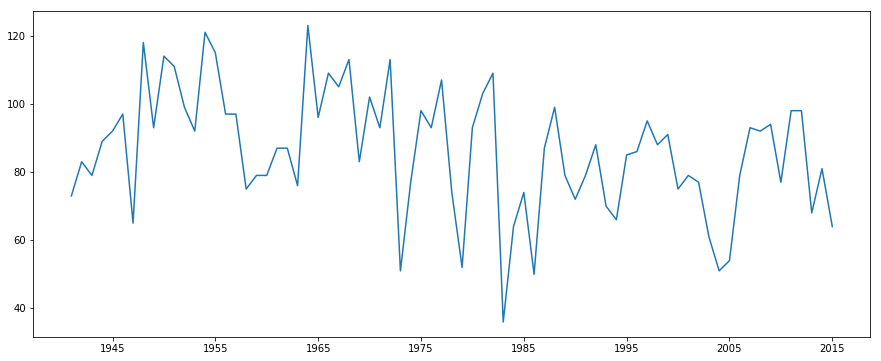

In [329]:
# Let's see how the date of last frost has or hasn't changed between 1941 and 2015
plt.plot(ts)

In [367]:
# I believe this is the bit of code required to do the time

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


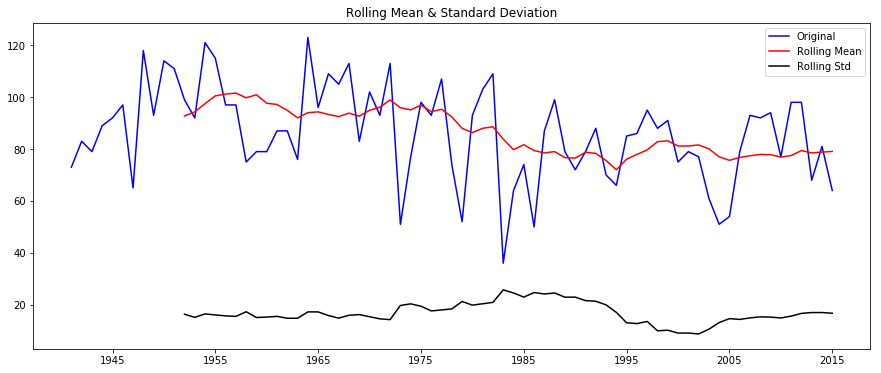

Results of Dickey-Fuller Test:
Test Statistic                -6.179846e+00
p-value                        6.495196e-08
#Lags Used                     0.000000e+00
Number of Observations Used    7.400000e+01
Critical Value (10%)          -2.588072e+00
Critical Value (5%)           -2.901470e+00
Critical Value (1%)           -3.521980e+00
dtype: float64


In [368]:
# this looks like the date of last frost is getting to be earlier in the year
test_stationarity(ts)

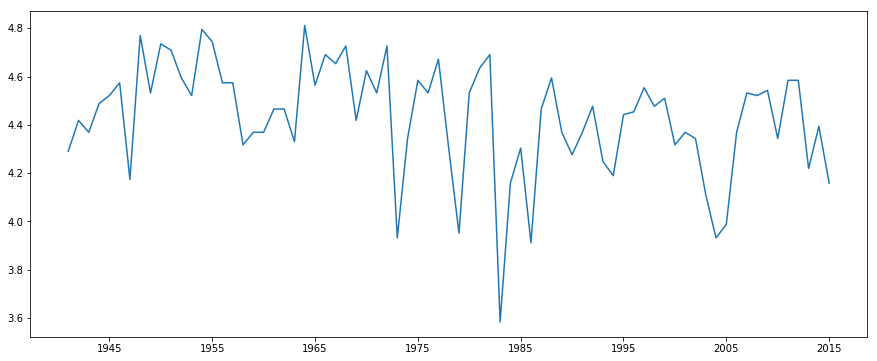

In [369]:
# This is supposed to estimate and eliminate trend
ts_log = np.log(ts)
plt.plot(ts_log)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  from ipykernel import kernelapp as app


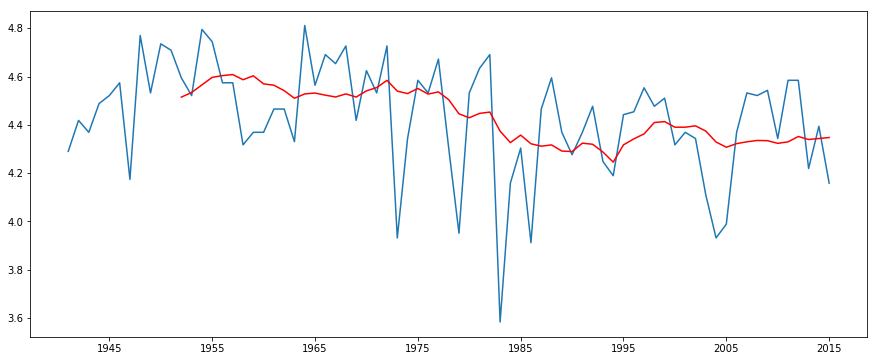

In [373]:
# Let's smooth the moving average with this red line
# still seeing that downward trend but with that dip for 1995
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [376]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Year
1941-01-01        NaN
1942-01-01        NaN
1943-01-01        NaN
1944-01-01        NaN
1945-01-01        NaN
1946-01-01        NaN
1947-01-01        NaN
1948-01-01        NaN
1949-01-01        NaN
1950-01-01        NaN
1951-01-01        NaN
1952-01-01    0.07992
Name: Julian, dtype: float64

In [378]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Year
1952-01-01    0.079920
1953-01-01   -0.012689
1954-01-01    0.229900
1955-01-01    0.147752
1956-01-01   -0.029642
Name: Julian, dtype: float64

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


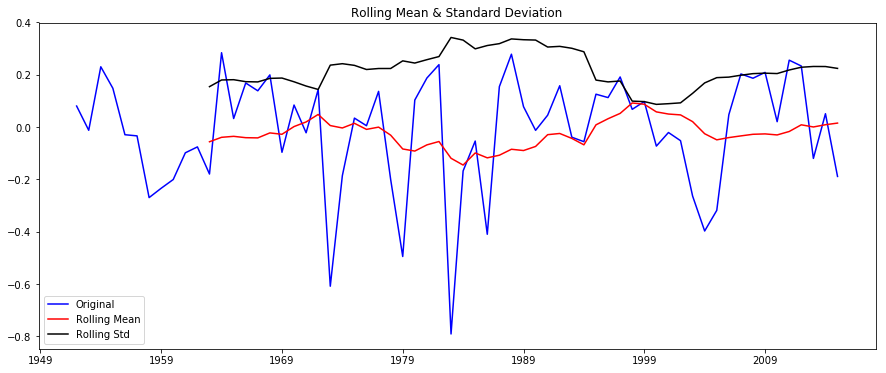

Results of Dickey-Fuller Test:
Test Statistic                -6.273443e+00
p-value                        3.952839e-08
#Lags Used                     0.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (10%)          -2.591897e+00
Critical Value (5%)           -2.908645e+00
Critical Value (1%)           -3.538695e+00
dtype: float64


In [377]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
# With a p-value of 3.95, I can not reject the null hypothesis that that date of last frost follows a unit root process. 
# The absolute value of my test statistic is greater than any critical value. More evidence that I can not reject the null. 

In [382]:
# expwighted_avg = pd.ewma(ts_log, halflife=12)
# plt.plot(ts_log)
# plt.plot(expwighted_avg, color='red')

In [383]:
# this didn't work and I can't figure out why 

# ts_log_ewma_diff = ts_log - expwighted_avg
# test_stationarity(ts_log_ewma_diff)

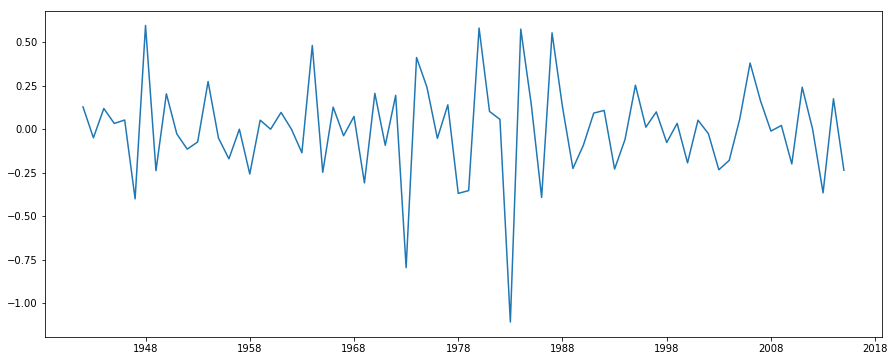

In [384]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


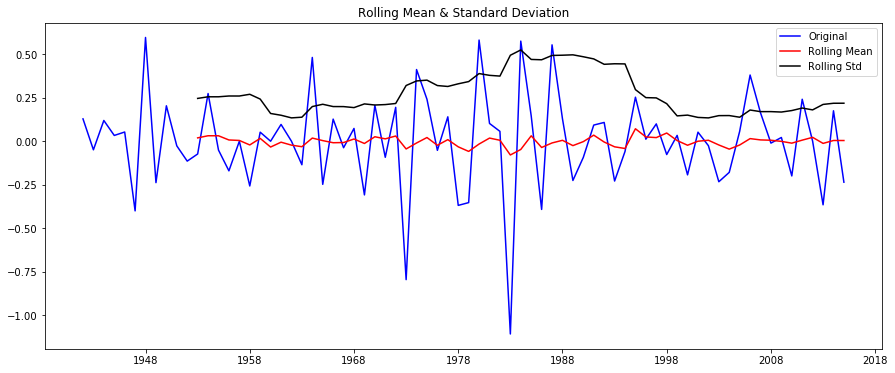

Results of Dickey-Fuller Test:
Test Statistic                -5.717969e+00
p-value                        7.048594e-07
#Lags Used                     8.000000e+00
Number of Observations Used    6.500000e+01
Critical Value (10%)          -2.591103e+00
Critical Value (5%)           -2.907154e+00
Critical Value (1%)           -3.535217e+00
dtype: float64


In [385]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [344]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [345]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

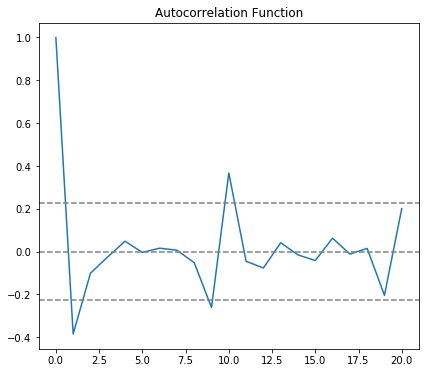

In [346]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

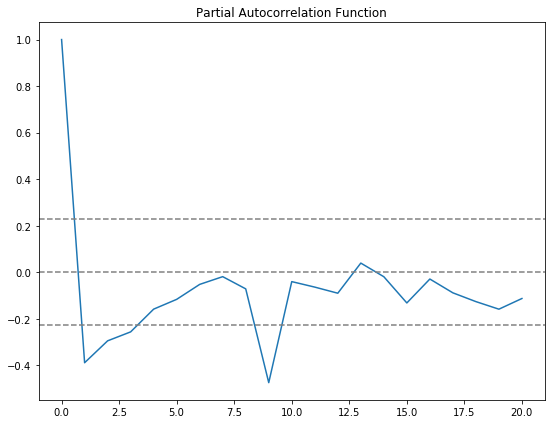

In [347]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [348]:
from statsmodels.tsa.arima_model import ARIMA

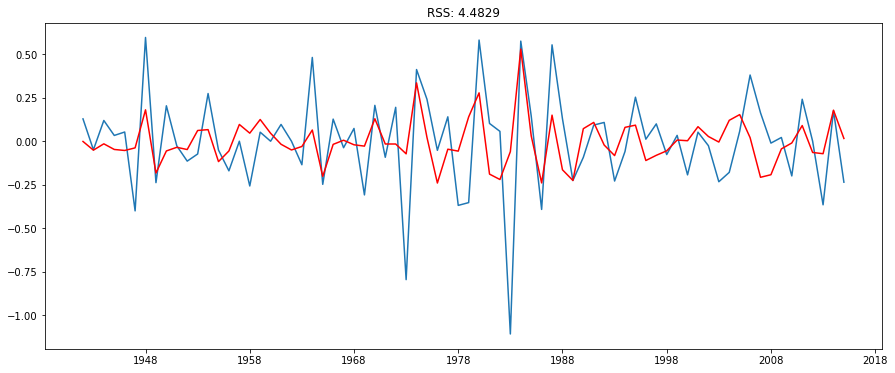

In [349]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

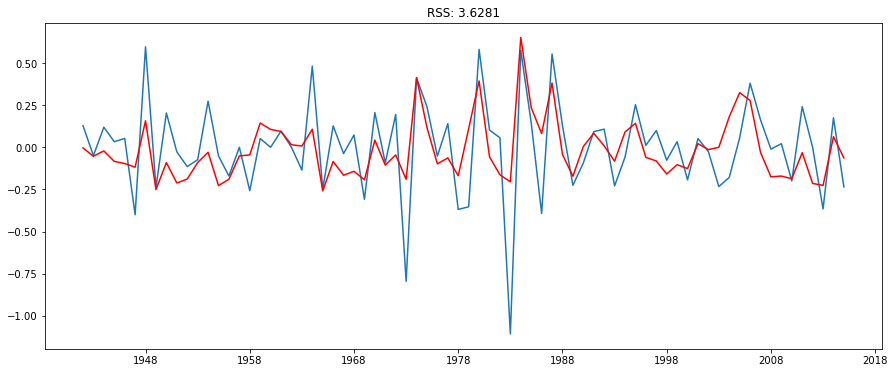

In [350]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\mundyj\appdata\local\continuum\miniconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


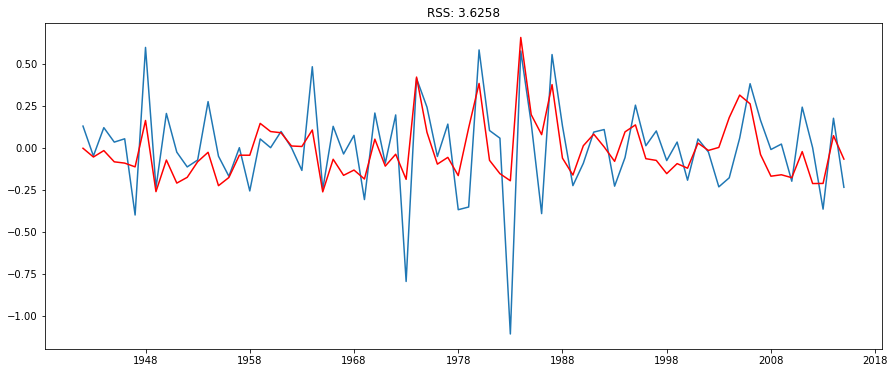

In [351]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [352]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Year
1942-01-01   -0.003337
1943-01-01   -0.055410
1944-01-01   -0.017297
1945-01-01   -0.084034
1946-01-01   -0.091714
dtype: float64


In [353]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Year
1942-01-01   -0.003337
1943-01-01   -0.058747
1944-01-01   -0.076044
1945-01-01   -0.160079
1946-01-01   -0.251793
dtype: float64


In [354]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
1941-01-01    4.290459
1942-01-01    4.287123
1943-01-01    4.231712
1944-01-01    4.214415
1945-01-01    4.130381
dtype: float64

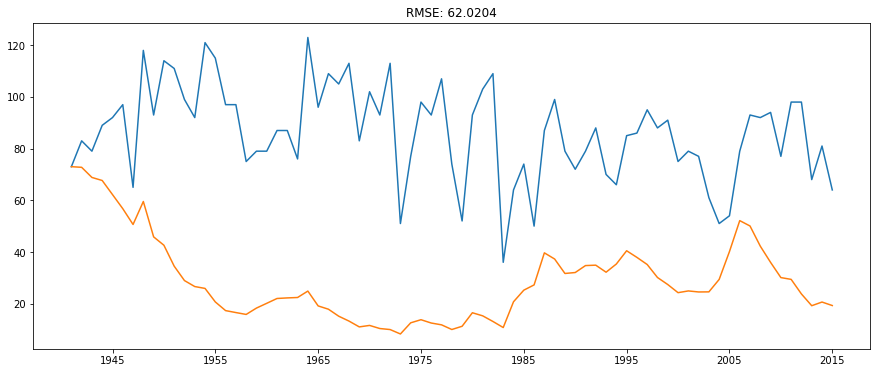

In [355]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))